In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Main task <br>
#### "Your task is to predict the article_ids each customer will purchase **during the 7-day period** immediately after the training data period."

Thực ra thì mình cũng có thể tự định nghĩa cái này, nhưng mà đang lấy theo cái kaggle :v

Vì không có tập test nên mình chia tập train ra thành 2 tập train với test (có thể tự build tập train với test theo cách của riêng mình cũng được, do là cái dset này lớn quá).<br>

NOTE: You must make predictions for all customer_id values found in the sample submission. All customers who made purchases during the test period are scored, regardless of whether they had purchase history in the training data.

### target feature là **article_id**

# Import, thống kê phân tích thăm dò, trực quan (EDA)

## Articles

- article_id : id của article
- product_code, prod_name : Để xác định code với tên của 1 product (không hẳn là giống nhau, đôi lúc có (1) (2) chẳng hạn) (unique)
- product_type, product_type_name : Group của product_code và tên của group đó
- graphical_appearance_no, graphical_appearance_name : Group của graphics và tên của nó
- colour_group_code, colour_group_name : Group của color và tên của nó
- perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : Info của màu được thêm vào
- department_no, department_name: : Để xác định được department và tên của department đó
- index_code, index_name: : Để xác định được index và tên của index đó (unique)
- index_group_no, index_group_name: : Group của index và tên của nó 
- section_no, section_name: :  Để xác định section và tên của nó (unique)
- garment_group_no, garment_group_name: : Để xác định được garment và tên của nó (unique)
- detail_desc: : Thông tin chi tiết

In [60]:
articles = pd.read_csv("E:\\h-and-m-personalized-fashion-recommendations\\articles.csv")
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


Nhìn sơ qua dữ liệu thì các feature quan trọng cho task của mình có thể là các categorical feature, đặc biệt là dạng group

Thống kê

In [19]:
# Các feature
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [97]:
# Số lượng unique value trong từng categorical feature
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        unique_number = articles[col].nunique()
        print(f'number of unique {col}: {unique_number}')

number of unique prod_name: 45875
number of unique product_type_name: 131
number of unique product_group_name: 19
number of unique graphical_appearance_name: 30
number of unique colour_group_name: 50
number of unique perceived_colour_value_name: 8
number of unique perceived_colour_master_name: 20
number of unique department_name: 250
number of unique index_name: 10
number of unique index_group_name: 5
number of unique section_name: 56
number of unique garment_group_name: 21
number of unique detail_desc: 43404


In [68]:
# Chọn 2 feature này để phân tích vì nó bao quát phân chia rõ rệt cho các article
group_counts = articles['garment_group_name'].value_counts()  
description_counts = articles['index_group_name'].value_counts()

Text(0.5, 0, 'count')

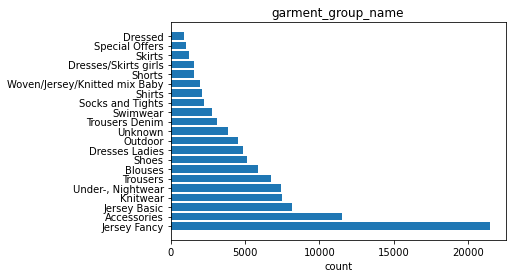

In [50]:
plt.barh(group_counts.index, group_counts.values)
plt.title('garment_group_name')
plt.xlabel('count')

Text(0.5, 0, 'count')

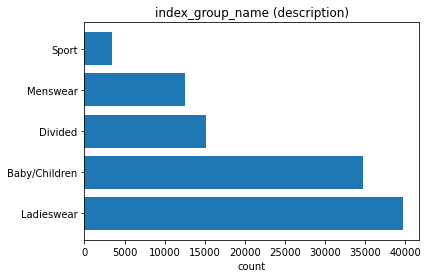

In [69]:
plt.barh(description_counts.index, description_counts.values)
plt.title('index_group_name (description)')
plt.xlabel('count')

Text(0, 0.5, 'garment group')

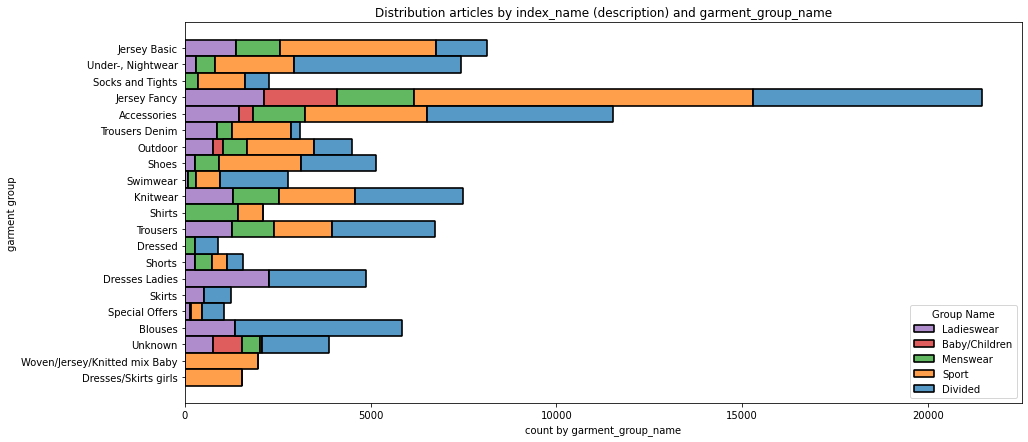

In [81]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple="stack", )
plt.title("Distribution articles by index_name (description) and garment_group_name")
plt.legend(title='Group Name', labels=['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'])
ax.set_xlabel('count by garment_group_name')
ax.set_ylabel('garment group')
# plt.savefig('E:\\h-and-m-personalized-fashion-recommendations\\articles_desc.png', dpi=500)

In [131]:
# Thống kê số lượng article theo garment_group_name và index_group_name
garment_index_count = articles.groupby(['garment_group_name', 'index_group_name']).count()['article_id']

# Dài quá nó ko hiện hết =))))))

In [134]:
for i in range(len(garment_index_count)):
    print(f'{garment_index_count.index[i]}:{garment_index_count[i]}')

('Accessories', 'Baby/Children'):3293
('Accessories', 'Divided'):1458
('Accessories', 'Ladieswear'):4999
('Accessories', 'Menswear'):1388
('Accessories', 'Sport'):381
('Blouses', 'Divided'):1346
('Blouses', 'Ladieswear'):4492
('Dressed', 'Ladieswear'):624
('Dressed', 'Menswear'):284
('Dresses Ladies', 'Divided'):2267
('Dresses Ladies', 'Ladieswear'):2607
('Dresses/Skirts girls', 'Baby/Children'):1541
('Jersey Basic', 'Baby/Children'):4193
('Jersey Basic', 'Divided'):1381
('Jersey Basic', 'Ladieswear'):1359
('Jersey Basic', 'Menswear'):1193
('Jersey Fancy', 'Baby/Children'):9103
('Jersey Fancy', 'Divided'):2128
('Jersey Fancy', 'Ladieswear'):6163
('Jersey Fancy', 'Menswear'):2077
('Jersey Fancy', 'Sport'):1974
('Knitwear', 'Baby/Children'):2038
('Knitwear', 'Divided'):1296
('Knitwear', 'Ladieswear'):2917
('Knitwear', 'Menswear'):1239
('Outdoor', 'Baby/Children'):1794
('Outdoor', 'Divided'):770
('Outdoor', 'Ladieswear'):1025
('Outdoor', 'Menswear'):664
('Outdoor', 'Sport'):248
('Shirts',

In [100]:
# Thống kê số lượng article theo index_group_name và index_name
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

## Customers

- customer_id :  Id để xác định customer
- FN : 1 hoặc bị thiếu
- Active : Là có đang hoạt động hay không. 1 hoặc bị thiếu
- club_member_status : Status trong club
- fashion_news_frequency : Mức độ mà H&M gửi news cho customer
- age : Tuổi
- postal_code : Postal code của customer

In [80]:
customers = pd.read_csv("E:\\h-and-m-personalized-fashion-recommendations\\customers.csv")
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


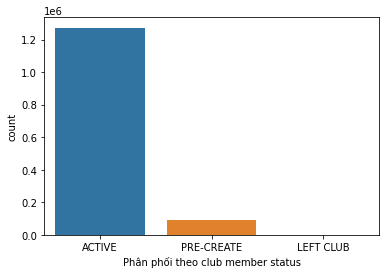

In [5]:
sns.countplot(data=customers, x='club_member_status')
plt.xlabel('Phân phối theo club member status')
plt.show()

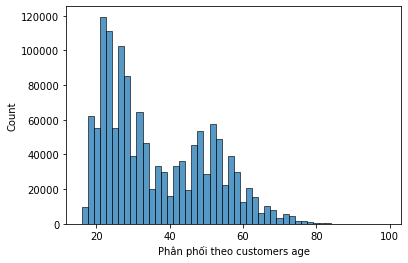

In [6]:
sns.histplot(data=customers, x='age', bins=50)
plt.xlabel('Phân phối theo customers age')
plt.show()

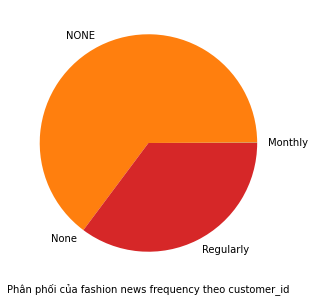

In [7]:
f, ax = plt.subplots(figsize=(10,5))
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()
ax.pie(pie_data.customer_id, labels=pie_data.index)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Phân phối của fashion news frequency theo customer_id')
plt.show()

## Transactions

- t_dat : Ngày giao dịch
- customer_id :  ID của customer
- article_id : ID của article
- price : Giá giao dịch
- sales_channel_id : 1 hoặc 2

In [48]:
transactions = pd.read_csv("E:\\h-and-m-personalized-fashion-recommendations\\transactions_train.csv")
transactions

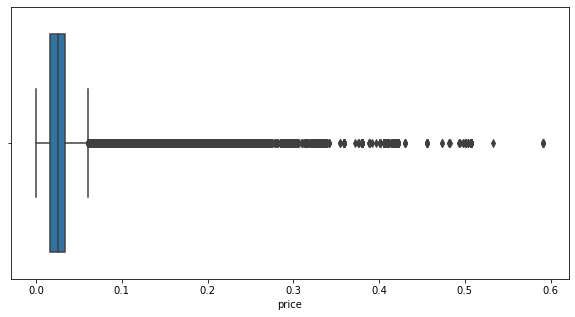

In [75]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price')
plt.show()

In [80]:
# Tính top purchase customer
top_customer = transactions.groupby('customer_id').count().sort_values(by='price', ascending=False)['price']
top_customer[0:50]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    1117
3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2    1115
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54    1099
e6498c7514c61d3c24669f49753dc83fdff3ec1

## Sample submission

Kiểm tra xem submission nó như thế nào

In [20]:
ssub = pd.read_csv("E:\\h-and-m-personalized-fashion-recommendations\\sample_submission.csv")
ssub

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


In [72]:
ssub["prediction"][1]

'0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001'

Nhìn có vẻ như là output nó hơi mơ hồ 1 tí =)))) <br>
Nên phải tự định nghĩa output, và cả train set cũng phải tự build từ những bảng trên

# Data Pre-processing

Chuyển t_dat sang InvoiceDate có định dạng đúng cho timeseries để tiện xử lí <br>
Ngoài ra xóa các mẫu bị trùng vì không cần thiết

In [23]:
transactions['InvoiceDate'] = pd.to_datetime(transactions['t_dat'], format='%Y-%m-%d')
transactions = transactions[["InvoiceDate", "customer_id", "article_id", "price","sales_channel_id"]].drop_duplicates()

In [6]:
transactions

,InvoiceDate,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [4]:
# Danh sách các customer mua hàng

unique_customers = transactions['customer_id'].unique().tolist()
len(unique_customers)

1362281

Có 1362281 customer mua hàng trong số tổng cộng là 1371980 customer

In [5]:
# Danh sách article id đã được mua

unique_articles = transactions['article_id'].unique().tolist()
len(unique_articles)

104547

Có 104547 article được mua trong tổng cộng 105542 article

## Phân tích RFM 

" Phân tích RFM là một kỹ thuật tiếp thị được sử dụng để xếp hạng và nhóm khách hàng một cách định lượng dựa trên mức độ gần đây (recency), tần suất (frequency) và tổng số tiền (monetary) của các giao dịch gần đây của họ để xác định những khách hàng tốt nhất và thực hiện các chiến dịch tiếp thị được nhắm mục tiêu. "

Sử dụng RFM để có thể xây dựng được các user-profile và xây dựng bộ dữ liệu train test phù hợp với mô hình lựa chọn

Vì collaborative filtering sẽ dựa vào transaction data của các customer, để tạo ra được user-profile. Giúp so sánh với những customer khác.

In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
start_date = datetime.datetime(2020,3,1)
# start_date = datetime.datetime(2020,9,1)

# Filter transactions by date
transactions["t_dat"] = pd.to_datetime(transactions["InvoiceDate"])
transactions = transactions.loc[transactions["t_dat"] >= start_date]

#analysis_date = max(transactions['InvoiceDate']) + dt.timedelta(days= 1)
analysis_date = datetime.datetime(2020,9,23)

transactions['date'] = transactions['InvoiceDate']
(analysis_date - transactions['InvoiceDate'].max()).days

rfm = transactions.groupby('customer_id').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'date': 'count',
    'price': 'sum'})

rfm.head()

,InvoiceDate,date,price
customer_id,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,10,0.225254
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,9,0.413407
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,0.255814
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,0.076237


Xây dựng user-profile

In [26]:
rfm.columns=["Recency","Frequency","Monetary"]
rfm = rfm[rfm["Monetary"] > 0]

In [27]:
# Ngày mà customer lần cuối purchase. Ngày gần nhất sẽ được gán 5 và xa nhất 1
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Tổng số purchase. Frequency ít nhất gán 1, nhiều nhất gán 5
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Tổng số tiền dành ra của customer. Ít nhất gán 1, nhiều nhất gán 5
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475,5,3,3
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,10,0.225254,3,4,4
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,9,0.413407,5,4,5
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,0.255814,4,3,4
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,0.076237,5,1,2


In [28]:
# RFM - Tính tổng điểm dựa vào recency và frequency
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

https://documentation.bloomreach.com/engagement/docs/rfm-segmentation-business-use
<br>
cho ranking

In [29]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475,5,3,3,53,potential_loyalists
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,10,0.225254,3,4,4,34,loyal_customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,9,0.413407,5,4,5,54,champions
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,0.255814,4,3,4,43,potential_loyalists
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,0.076237,5,1,2,51,new_customers


In [30]:
# Thống kê
rfm[["segment", "Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

Recency              Frequency              Monetary  \
                       mean   count  max      mean   count  max     mean   
segment                                                                    
about_to_sleep         61.0   56889   79       2.0   56889    4      0.0   
at_Risk               123.0  112570  206       8.0  112570   15      0.0   
cant_loose            110.0   19553  206      23.0   19553  167      1.0   
champions               9.0  100375   18      26.0  100375  589      1.0   
hibernating           138.0  177210  206       2.0  177210    4      0.0   
loyal_customers        43.0  146141   79      19.0  146141  388      0.0   
need_attention         61.0   34863   79       6.0   34863    8      0.0   
new_customers           9.0   16109   18       1.0   16109    2      0.0   
potential_loyalists    21.0   95306   43       5.0   95306    8      0.0   
promising              30.0   19932   43       1.0   19932    2      0.0   

                                   
                      count   max  
segment                            
about_to_sleep        56889   1.0  
at_Risk              112570   1.0  
cant_loose            19553   6.0  
champions            100375  26.0  
hibernating          177210   1.0  
loyal_customers      146141  10.0  
need_attention        34863   1.0  
new_customers         16109   1.0  
potential_loyalists   95306   2.0  
promising             19932   1.0

## Tạo dữ liệu Item-based cho Collaborative Filtering

In [31]:
rfm = rfm.reset_index()

In [32]:
transactions.head(10)

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date
22886405,2020-03-01,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,751628002,0.022017,1,2020-03-01,2020-03-01
22886406,2020-03-01,0008968c0d451dbc5a9968da03196fe20051965edde741...,675662028,0.035576,2,2020-03-01,2020-03-01
22886407,2020-03-01,001127bffdda108579e6cb16080440e89bf1250a776c6e...,821152004,0.025407,2,2020-03-01,2020-03-01
22886408,2020-03-01,001127bffdda108579e6cb16080440e89bf1250a776c6e...,860738001,0.025407,2,2020-03-01,2020-03-01
22886409,2020-03-01,00117f79ce61af038e143ee26448e8401fdbff51f48d5a...,822957002,0.045746,2,2020-03-01,2020-03-01
22886410,2020-03-01,00117f79ce61af038e143ee26448e8401fdbff51f48d5a...,850426007,0.015237,2,2020-03-01,2020-03-01
22886411,2020-03-01,00117f79ce61af038e143ee26448e8401fdbff51f48d5a...,889471001,0.007610,2,2020-03-01,2020-03-01
22886412,2020-03-01,00227494dd4e87da02bb1ab4afc38f13f2e11c6517b1bb...,690449036,0.067780,2,2020-03-01,2020-03-01
22886413,2020-03-01,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,741259002,0.033881,2,2020-03-01,2020-03-01
22886414,2020-03-01,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,794320006,0.042356,2,2020-03-01,2020-03-01


In [44]:
rfm.head(10)

,customer_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,18,6,0.144475,5,3,3,53,potential_loyalists
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,77,10,0.225254,3,4,4,34,loyal_customers
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,8,9,0.413407,5,4,5,54,champions
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,42,7,0.255814,4,3,4,43,potential_loyalists
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,9,2,0.076237,5,1,2,51,new_customers
5,00007d2de826758b65a93dd24ce629ed66842531df6699...,133,10,0.174746,1,4,3,14,at_Risk
6,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,64,2,0.042339,3,1,1,31,about_to_sleep
7,00009c2aeae8761f738e4f937d9be6b49861a66339c2b1...,92,4,0.067559,2,2,2,22,hibernating
8,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,24,46,1.282119,4,5,5,45,loyal_customers
9,0000b2f1829e23b24feec422ef13df3ccedaedc85368e6...,25,16,0.322220,4,5,4,45,loyal_customers


In [43]:
# Merge inner joion rfm với transactions bằng customer_id
transactions = pd.merge(transactions, rfm[["customer_id","segment"]], how = 'inner', on = 'customer_id')

transactions

,t_dat,customer_id,article_id,price,sales_channel_id,segment
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,champions
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,champions
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,champions
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,champions
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,champions
...,...,...,...,...,...,...
26845675,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,new_customers
26845676,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,new_customers
26845677,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,913597001,0.042356,2,potential_loyalists
26845678,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,903420001,0.033881,2,potential_loyalists


In [44]:
# Lấy những khách hàng được đánh giá cao
training_segment = ['champions', 'potential_loyalists', 'new_customers','promising','loyal_customers']

transactions = transactions[transactions['segment'].isin(training_segment)]

transactions

,t_dat,customer_id,article_id,price,sales_channel_id,segment
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,champions
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,champions
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,champions
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,champions
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,champions
...,...,...,...,...,...,...
26845675,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,new_customers
26845676,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,new_customers
26845677,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,913597001,0.042356,2,potential_loyalists
26845678,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,903420001,0.033881,2,potential_loyalists


In [45]:
# Drop segment vì không cần thiết nữa
transactions = transactions.drop('segment', axis=1)

transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2
...,...,...,...,...,...
26845675,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2
26845676,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2
26845677,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,913597001,0.042356,2
26845678,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,903420001,0.033881,2


In [36]:
start_date = datetime.datetime(2020,9,1)

# Lọc lấy các transaction bằng date
transactions["t_dat"] = transactions["InvoiceDate"]
transactions = transactions.loc[transactions["InvoiceDate"] >= start_date]

transactions

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date
27,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2,2020-09-14,2020-09-14
50,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,902802002,0.033881,2,2020-09-03,2020-09-03
51,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000007,0.050831,2,2020-09-03,2020-09-03
52,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,918292001,0.042356,2,2020-09-03,2020-09-03
53,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000001,0.050831,2,2020-09-03,2020-09-03
...,...,...,...,...,...,...,...
8097203,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,914404001,0.042356,2,2020-09-22,2020-09-22
8097204,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,751471041,0.033881,2,2020-09-22,2020-09-22
8097205,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,751471038,0.033881,2,2020-09-22,2020-09-22
8097206,2020-09-22,ffc92c3f7b0b302f393c2968b290f6e5c5b5510d1cf1df...,895730002,0.045746,2,2020-09-22,2020-09-22


In [37]:
# Lọc transaction bằng số lượng của 1 article đã được mua
article_bought_count = transactions[['article_id', 'InvoiceDate']].groupby('article_id').count().reset_index().rename(columns={'InvoiceDate': 'count'})

most_bought_articles = article_bought_count[article_bought_count['count'] > 10]['article_id'].values

transactions = transactions[transactions['article_id'].isin(most_bought_articles)]

transactions["bought"] = 1 

<ipython-input-37-5d03db2571ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["bought"] = 1


In [38]:
# Đếm số lượt mua article
article_bought_count = transactions[['article_id', 'InvoiceDate']].groupby('article_id').count().reset_index().rename(columns={'InvoiceDate': 'count'})
article_bought_count

,article_id,count
0,111565001,83
1,111586001,184
2,111593001,183
3,111609001,55
4,123173001,183
...,...,...
9220,949551002,58
9221,952267001,34
9222,953450001,16
9223,953763001,24


In [39]:
# Chọn ra những article mà có số lượng mua nhiều (>10)
most_bought_articles = article_bought_count[article_bought_count['count'] > 10]['article_id'].values
most_bought_articles

array([111565001, 111586001, 111593001, ..., 953450001, 953763001,
       956217002], dtype=int64)

In [40]:
# Lấy transaction nào mà có lượt mua nhiều
transactions = transactions[transactions['article_id'].isin(most_bought_articles)]

transactions["bought"] = 1 

transactions

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
27,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2,2020-09-14,2020-09-14,1
50,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,902802002,0.033881,2,2020-09-03,2020-09-03,1
51,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000007,0.050831,2,2020-09-03,2020-09-03,1
52,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,918292001,0.042356,2,2020-09-03,2020-09-03,1
53,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000001,0.050831,2,2020-09-03,2020-09-03,1
...,...,...,...,...,...,...,...,...
8097203,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,914404001,0.042356,2,2020-09-22,2020-09-22,1
8097204,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,751471041,0.033881,2,2020-09-22,2020-09-22,1
8097205,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,751471038,0.033881,2,2020-09-22,2020-09-22,1
8097206,2020-09-22,ffc92c3f7b0b302f393c2968b290f6e5c5b5510d1cf1df...,895730002,0.045746,2,2020-09-22,2020-09-22,1


In [56]:
# Tạo negative sample
np.random.seed(11)

negative_samples = pd.DataFrame({
    'article_id': np.random.choice(transactions.article_id.unique(), transactions.shape[0]*0.2),
    'customer_id': np.random.choice(transactions.customer_id.unique(), transactions.shape[0]*0.2),
    'bought': np.zeros(transactions.shape[0])
})

negative_samples

,article_id,customer_id,bought
0,736783004,2f5200fe51c911670bd13b41d4666e7f92d0842e806757...,0.0
1,893323001,294d00865222ba7be0b63b59c9ab1f8b5e8a9a4791de35...,0.0
2,851774011,4eac1e269a7db53842996de92f088be88560c54ba1db18...,0.0
3,765308002,0769d2be5c685e6e9dcd3068c7c4aa15790621c313bcd0...,0.0
4,894681001,dcd1697f33f0b19107c7281c243e49400f3a0fed3e4c5f...,0.0
...,...,...,...
671669,673677024,edacae9ede300142297c8e52425506dbfe4c051cb586c4...,0.0
671670,860949003,c55a73bd619af4e2d425eba59708e1095b3846c5a8ff75...,0.0
671671,910872001,f770a7b997d48463f1009cd6af3476633fe0a06f5da725...,0.0
671672,851094009,69e8b5f0d346005135099c000a013aa3ec393dab61ab61...,0.0


In [57]:
# Dữ liệu cuối cùng sẽ được nối vào
transactions = pd.concat([transactions, negative_samples])
transactions

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
27,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2.0,2020-09-14,2020-09-14,1.0
50,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,902802002,0.033881,2.0,2020-09-03,2020-09-03,1.0
51,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000007,0.050831,2.0,2020-09-03,2020-09-03,1.0
52,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,918292001,0.042356,2.0,2020-09-03,2020-09-03,1.0
53,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000001,0.050831,2.0,2020-09-03,2020-09-03,1.0
...,...,...,...,...,...,...,...,...
671669,NaT,edacae9ede300142297c8e52425506dbfe4c051cb586c4...,673677024,NaN,NaN,NaT,NaT,0.0
671670,NaT,c55a73bd619af4e2d425eba59708e1095b3846c5a8ff75...,860949003,NaN,NaN,NaT,NaT,0.0
671671,NaT,f770a7b997d48463f1009cd6af3476633fe0a06f5da725...,910872001,NaN,NaN,NaT,NaT,0.0
671672,NaT,69e8b5f0d346005135099c000a013aa3ec393dab61ab61...,851094009,NaN,NaN,NaT,NaT,0.0


In [58]:
# Lưu dữ liệu
compression_opts = dict(method='zip', archive_name='E:\\h-and-m-personalized-fashion-recommendations\\cf_dataset.zip')

transactions.to_csv('E:\\h-and-m-personalized-fashion-recommendations\\cf_dataset.zip', index=False, compression = compression_opts) 

## Tạo Meta Data cho Content Based Filtering

Tạo meta data cho article bằng cách sử dụng những feature quan trọng sau đây: 
- garment_group_name
- product_group_name
- index_group_name

In [61]:
# Bỏ những feature không cần thiết

articles.drop(columns=['product_code', 'prod_name', 'product_type_no', 'product_type_name',
                       'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code',
                       'colour_group_name','perceived_colour_value_id', 'perceived_colour_value_name',
                       'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 
                       'department_name', 'index_code', 'index_name', 'index_group_no', 'section_no', 
                       'section_name', 'garment_group_no', 'detail_desc'], inplace= True)

In [62]:
# Số hóa cho các thuộc tính
articles = pd.get_dummies(articles, columns=['product_group_name', 'index_group_name', 'garment_group_name'])
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 46 columns):
 #   Column                                            Non-Null Count   Dtype
---  ------                                            --------------   -----
 0   article_id                                        105542 non-null  int64
 1   product_group_name_Accessories                    105542 non-null  uint8
 2   product_group_name_Bags                           105542 non-null  uint8
 3   product_group_name_Cosmetic                       105542 non-null  uint8
 4   product_group_name_Fun                            105542 non-null  uint8
 5   product_group_name_Furniture                      105542 non-null  uint8
 6   product_group_name_Garment Full body              105542 non-null  uint8
 7   product_group_name_Garment Lower body             105542 non-null  uint8
 8   product_group_name_Garment Upper body             105542 non-null  uint8
 9   product_group_name_Garment

In [63]:
articles.head(10)

,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,108775015,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,108775044,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,108775051,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,110065001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,110065002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,110065011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,111565001,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,111565003,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,111586001,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,111593001,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
# Lưu dữ liệu
compression_articles = dict(method='zip', archive_name='E:\\h-and-m-personalized-fashion-recommendations\\cb_dataset.zip')

articles.to_csv('E:\\h-and-m-personalized-fashion-recommendations\\cb_dataset.zip', index=False, compression=compression_articles) 

# Collaborative Filtering

https://surpriselib.com/ <br>
https://realpython.com/build-recommendation-engine-collaborative-filtering/

In [65]:
import pickle
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD, NMF

In [3]:
transactions = pd.read_csv('E:\\h-and-m-personalized-fashion-recommendations\\cf_dataset.zip')
transactions

e:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
0,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2.0,2020-09-14,2020-09-14,1.0
1,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,902802002,0.033881,2.0,2020-09-03,2020-09-03,1.0
2,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000007,0.050831,2.0,2020-09-03,2020-09-03,1.0
3,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,918292001,0.042356,2.0,2020-09-03,2020-09-03,1.0
4,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000001,0.050831,2.0,2020-09-03,2020-09-03,1.0
...,...,...,...,...,...,...,...,...
1343343,NaN,edacae9ede300142297c8e52425506dbfe4c051cb586c4...,673677024,NaN,NaN,NaN,NaN,0.0
1343344,NaN,c55a73bd619af4e2d425eba59708e1095b3846c5a8ff75...,860949003,NaN,NaN,NaN,NaN,0.0
1343345,NaN,f770a7b997d48463f1009cd6af3476633fe0a06f5da725...,910872001,NaN,NaN,NaN,NaN,0.0
1343346,NaN,69e8b5f0d346005135099c000a013aa3ec393dab61ab61...,851094009,NaN,NaN,NaN,NaN,0.0


https://surprise.readthedocs.io/en/stable/reader.html <br>
https://surprise.readthedocs.io/en/stable/dataset.html

In [67]:
reader = Reader(rating_scale = (0,1))
customer_data = Dataset.load_from_df(transactions[['customer_id', 'article_id', 'bought']], reader)

In [68]:
trainset, testset = train_test_split(customer_data, test_size=0.2, random_state=42)

## Modeling

### SVD

In [69]:
svd_model = SVD(n_factors= 10, n_epochs= 50)

svd_model.fit(trainset)

svd_predictions = svd_model.test(testset)

svd_predictions = accuracy.rmse(svd_predictions)

svd_predictions

RMSE: 0.4306


0.4305796595494124

In [59]:
# i = 11
# svd_model.predict(transactions['customer_id'][i], transactions['article_id'][i])

Prediction(uid='0063faad1cf48d3d6e02d02b3890248173fd59aefe8ecd0c3817b9688ba93124', iid=832051004, r_ui=None, est=1, details={'was_impossible': False})

### NFM

In [70]:
nmf_model = NMF(n_factors = 10, n_epochs = 100)

nmf_model.fit(trainset)

nmf_predictions = nmf_model.test(testset)

nmf_predictions = accuracy.rmse(nmf_predictions)

nmf_predictions

RMSE: 0.4769


0.47685210795678434

SVD nhỉnh hơn

## Final model
Chọn SVD

Không chia dataset thành các fold để đánh giá nữa mà trả về đầy đủ trainset

In [71]:
trainset_full = customer_data.build_full_trainset()

In [72]:
final_model = SVD(n_factors= 10, n_epochs= 50)
final_model.fit(trainset_full)

In [73]:
import pickle 

# Lưu model
pickle.dump(final_model, open('E:\\h-and-m-personalized-fashion-recommendations\\collaborative_model.sav', 'wb'))

In [2]:
import pickle 
# Load model
final_model = pickle.load(open('E:\\h-and-m-personalized-fashion-recommendations\\collaborative_model.sav', 'rb'))

## Xây dựng Recommender System

In [4]:
# Phải load lại meta data để trả về thông tin của article được recommend

meta_articles = pd.read_csv('E:\\h-and-m-personalized-fashion-recommendations\\articles.csv', index_col='article_id')

transactions = pd.read_csv('E:\\h-and-m-personalized-fashion-recommendations\\cf_dataset.zip')

In [5]:
# Transaction data là subset để show các customer và article đã mua
df_customer = transactions.set_index('customer_id')
df_customer.drop(columns=['InvoiceDate', 'price', 'sales_channel_id', 't_dat', 'date', 'bought'], inplace=True)  # Bỏ vì không cần thiết nữa
df_customer

,article_id
customer_id,
0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,893059004
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,902802002
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,805000007
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,918292001
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,805000001
...,...
edacae9ede300142297c8e52425506dbfe4c051cb586c48cfc82744b322ab467,673677024
c55a73bd619af4e2d425eba59708e1095b3846c5a8ff75ca5100e5968cf8d183,860949003
f770a7b997d48463f1009cd6af3476633fe0a06f5da725577be83311baf33803,910872001


Hàm recommend

In [20]:
def customer_article_recommend(user, n_recs):
    
    # Tạo list các article đã được mua
    have_bought = list(df_customer.loc[user]['article_id'])

    # Tạo df mới từ meta data
    not_bought = meta_articles.copy()

    # Xóa index (article_id) mà liên quan đến article đã được mua
    not_bought.drop(have_bought, inplace=True)

    # Reset lại index
    not_bought.reset_index(inplace=True)

    # Sử dụng .apply để áp dụng hàm cho toàn bộ cell. Sử dụng để predict ra estimated rating cho từng article
    not_bought['est_purchase'] = not_bought['article_id'].apply(lambda x: final_model.predict(user, x).est)

    # Sort theo estimated rating vừa được dự đoán
    not_bought.sort_values(by='est_purchase', ascending=False, inplace=True)

    # Đổi tên feature để nhìn cho ổn áp hơn
    not_bought.rename(columns={'prod_name':'Product Name','product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name':'Garment Group Name'}, inplace=True)
    not_bought = not_bought[['article_id','Product Name', 'Product Type Name', 'Product Group Name', 'Index Group Name', 'Garment Group Name']]

    # Lấy top 100 recommendation
    not_bought.iloc[:100, :]
    not_bought = not_bought.sample(frac=1).reset_index(drop=True)
    
    # Trả về n recommendation
    return not_bought.head(n_recs)

In [21]:
try1 = customer_article_recommend(transactions['customer_id'][0], 20)
try1

,article_id,Product Name,Product Type Name,Product Group Name,Index Group Name,Garment Group Name
0,711753006,ED Duo LS,Top,Garment Upper body,Ladieswear,Jersey Fancy
1,717810001,Holger s/s shirt,Shirt,Garment Upper body,Baby/Children,Shirts
2,728841006,Spruce Espadrille PQ,Sandals,Shoes,Menswear,Shoes
3,766979001,ED East paperbag,Trousers,Garment Lower body,Ladieswear,Trousers
4,822668001,TC NEW WOOL COMB,Bag,Accessories,Ladieswear,Unknown
5,508942004,HOLIDAY DRESS (1),Dress,Garment Full body,Baby/Children,Jersey Basic
6,811960001,Fancy tights 2-p,Underwear Tights,Socks & Tights,Baby/Children,Socks and Tights
7,869104001,DEAN HALF ZIP,Sweater,Garment Upper body,Baby/Children,Jersey Fancy
8,497448002,MAGGIE trouser,Trousers,Garment Lower body,Baby/Children,Woven/Jersey/Knitted mix Baby
9,844198002,Saturn trs (J),Pyjama bottom,Nightwear,Ladieswear,"Under-, Nightwear"


# Content-based Filtering

In [98]:
from sklearn.metrics.pairwise import cosine_similarity

In [100]:
meta_data = pd.read_csv('E:\\h-and-m-personalized-fashion-recommendations\\cb_dataset.zip')
articles_df = pd.read_csv('E:\\h-and-m-personalized-fashion-recommendations\\articles.csv')

In [104]:
# Compiling the above code into a working function that takes a article ID as input and returns n-recommendations
def article_recommend(articleid, n_recs):

    article = articles_df.index[articles_df['article_id'] == int(articleid)]

    # Lấy ra các hàng có index là article
    y = np.array(meta_data.loc[article]).reshape(1, -1)

    # Tính similarity score dựa vào cosine distance
    cos_sim = cosine_similarity(meta_data, y)

    # Tạo ra df mới với similarity score
    cos_sim = pd.DataFrame(data=cos_sim, index=meta_data.index)

    # Sort giảm dần theo score
    cos_sim.sort_values(by = 0, ascending = False, inplace=True)

    # Lấy ra top n recommendation
    results = cos_sim.index.values[1:n_recs+1]

    results_df = articles_df.loc[results]

    results_df.reset_index(inplace=True)

    results_df.rename(columns={'prod_name':'Product Name','product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name':'Garment Group Name'}, inplace=True)
    results_df = results_df[['article_id', 'Product Name', 'Product Type Name', 'Product Group Name', 'Index Group Name', 'Garment Group Name']]

    return results_df

In [105]:
try2 = article_recommend(articles_df['article_id'][0], 3)
try2

,article_id,Product Name,Product Type Name,Product Group Name,Index Group Name,Garment Group Name
0,760158001,DIV Rachel denim,Trousers,Garment Lower body,Divided,Unknown
1,760214002,Semide tie dress,Dress,Garment Full body,Ladieswear,Dresses Ladies
2,760208001,Class Cleo bracelet,Bracelet,Accessories,Ladieswear,Accessories
